# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [5]:
import pandas as pd


Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [7]:
baby_names = pd.read_csv("./lab12_files/US_Baby_Names_right.csv")
#typ danych
print(baby_names.dtypes)
print('\n')

Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object




Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [6]:
#pierwsze 10 rekordów
print(baby_names.head(10))

NameError: name 'baby_names' is not defined

Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [16]:
print(baby_names.head(10).drop(columns=['Unnamed: 0','Id']))

       Name  Year Gender State  Count
0      Emma  2004      F    AK     62
1   Madison  2004      F    AK     48
2    Hannah  2004      F    AK     46
3     Grace  2004      F    AK     44
4     Emily  2004      F    AK     41
5   Abigail  2004      F    AK     37
6    Olivia  2004      F    AK     33
7  Isabella  2004      F    AK     30
8    Alyssa  2004      F    AK     29
9    Sophia  2004      F    AK     28


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [19]:
f_names=baby_names['Gender'].value_counts()['F']
m_names=baby_names['Gender'].value_counts()['M']
if f_names>m_names:
    print(f'Więcej jest imion żeńskich-{f_names} niz męskich-{m_names}')
else:
    print(f'Więcej jest imion męskich-{m_names} niz żeńskich-{f_names}')

Więcej jest imion żeńskich-558846 niz męskich-457549


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [35]:
most_popular_names=baby_names['Name'].value_counts().head(10)
print(most_popular_names)

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: count, dtype: int64


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

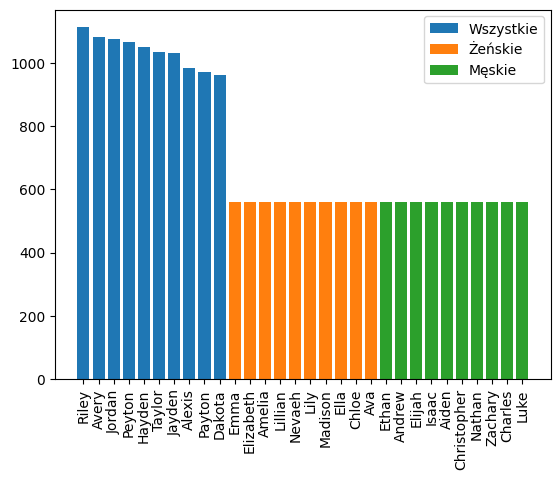

In [10]:
import numpy as np
import matplotlib.pyplot as plt

most_popular_names=baby_names['Name'].value_counts().head(10)
most_popular_fnames=baby_names[baby_names["Gender"] == "F"]["Name"].value_counts().head(10)
most_popular_mnames=baby_names[baby_names["Gender"] == "M"]["Name"].value_counts().head(10)

fig, ax = plt.subplots()
ax.bar(most_popular_names.index, most_popular_names.values, label="Wszystkie")
ax.bar(most_popular_fnames.index, most_popular_fnames.values, label="Żeńskie")
ax.bar(most_popular_mnames.index, most_popular_mnames.values, label="Męskie")
plt.xticks(rotation=90)
plt.legend()
plt.show()


Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [54]:
print(len(baby_names['Name'].unique()))

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [15]:
name_distribution=baby_names['Name'].value_counts(normalize=True)
def random_name():
    return np.random.choice(name_distribution.index,p=name_distribution.values)

print(random_name())


Avery


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [23]:
print(f"Najczęstsze imie: {name_distribution.idxmax()}")
print(f"Średnia: {name_distribution.mean()}")
print(f"Mediana: {name_distribution.median()}")
print(f"Odchylenie standardowe {name_distribution.std()}")


Najczęstsze imie: Riley
Średnia: 5.6715063520871134e-05
Mediana: 7.870955681600165e-06
Odchylenie standardowe 0.00012006155432498086


## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.